importing modules

In [2]:
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Input

Creating the stuff

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory=r"E:\programs\ml__tutorial\catdogcnn\animals\train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=r"E:\programs\ml__tutorial\catdogcnn\animals\test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)


Found 434 files belonging to 2 classes.
Found 566 files belonging to 2 classes.


In [4]:
print(train_ds.class_names)

['cat', 'dog']


In [5]:
#normalize

def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds =  train_ds.map(process)
validation_ds =  validation_ds.map(process)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Input

model = Sequential()

# Block 1
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                 input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 2
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 3
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Classifier
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer (binary)
model.add(Dense(1, activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds, epochs = 10  , validation_data = validation_ds)  

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5599 - loss: 0.8368 - val_accuracy: 0.4364 - val_loss: 0.7128
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6290 - loss: 0.6270 - val_accuracy: 0.7261 - val_loss: 0.5827
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7857 - loss: 0.4777 - val_accuracy: 0.8410 - val_loss: 0.3978
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8894 - loss: 0.3075 - val_accuracy: 0.8640 - val_loss: 0.3423
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9032 - loss: 0.2498 - val_accuracy: 0.8905 - val_loss: 0.3022
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9378 - loss: 0.1388 - val_accuracy: 0.8710 - val_loss: 0.3961
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9608 - loss: 0.1153 - val_accuracy: 0.8445 - val_loss: 0.3876
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.9908 - loss: 0.0436 - val_accuracy: 0.9028 - val_loss:

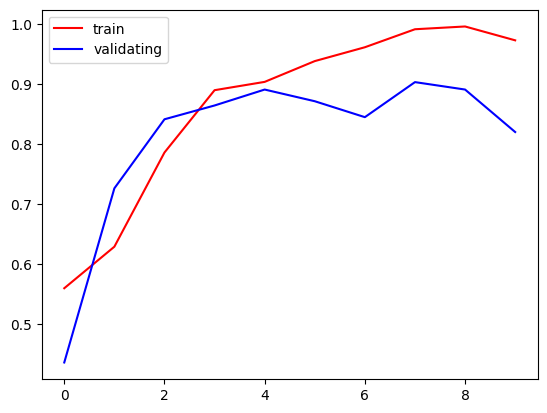

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validating')
plt.legend()
plt.show()


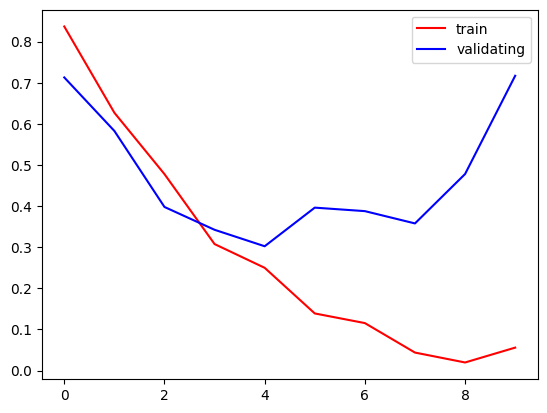

In [12]:
plt.plot(history.history['loss'],color = 'red' , label = 'train')
plt.plot(history.history['val_loss'],color = 'blue' , label = 'validating')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


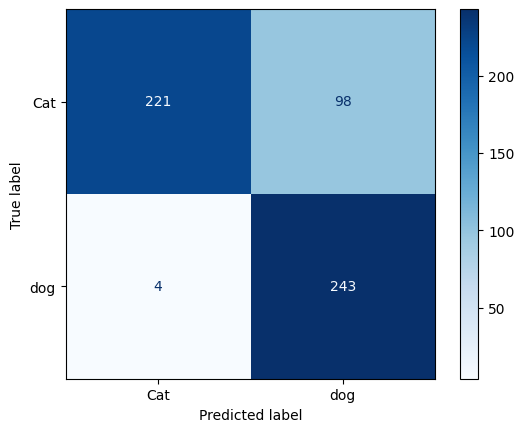

In [23]:
#confusion matrix 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []

for images, labels in validation_ds:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Cat", "dog"]
)

disp.plot(cmap="Blues")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


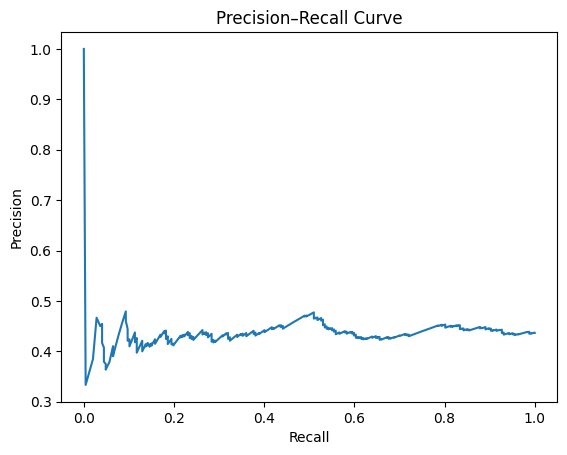

In [24]:
#precision recall curve
from sklearn.metrics import precision_recall_curve

probs = []

for images, labels in validation_ds:
    probs.extend(model.predict(images).flatten())

precision, recall, _ = precision_recall_curve(y_true, probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()

In [30]:
loss, acc = model.evaluate(validation_ds)
print(f"Validation Accuracy: {acc:.2f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 505ms/step - accuracy: 0.8922 - loss: 0.4935
Validation Accuracy: 0.89


(np.float64(-0.5), np.float64(799.5), np.float64(599.5), np.float64(-0.5))

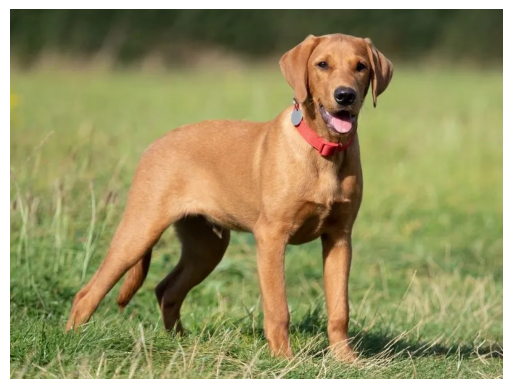

In [26]:
import matplotlib.pyplot as plt
from PIL import Image

img_path = r"E:\programs\ml__tutorial\catdogcnn\try\images2.jpg"
img_path2 = r"E:\programs\ml__tutorial\catdogcnn\try\images.jpg"
img_path3 = r"E:\programs\ml__tutorial\catdogcnn\try\dogtest.webp"

img = Image.open(img_path)
img3 = Image.open(img_path3)
img2 = Image.open(img_path2)
# plt.imshow(img)
plt.imshow(img3)
# plt.imshow(img3)
plt.axis("off")


In [20]:
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img_path = r"E:\programs\ml__tutorial\catdogcnn\try\cat.jpg"

img = load_img(img_path, target_size=(256,256))
img = img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)[0][0]

if prediction > 0.5:
    print("Dog ")
else:
    print("Cat ")

print("Confidence:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Cat 
Confidence: 0.108233415


In [21]:
model.save("cat_dog_cnn_model.keras")